 # All the Imports from all the worksheets
 copy paste into your exam notebook

In [1]:
from skimage import color, io, measure
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom
import seaborn as sns
import pandas as pd
from sklearn import decomposition
import math
from skimage.filters import threshold_otsu
from skimage import color
from scipy.ndimage import correlate
from skimage.filters import median
from skimage.filters import gaussian
from skimage.filters import prewitt_h
from skimage.filters import prewitt_v
from skimage.filters import prewitt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk 
from skimage.morphology import binary_closing, binary_opening
from skimage.color import label2rgb
from scipy.stats import norm
from scipy.spatial import distance
from skimage.util import img_as_float, img_as_uint
from skimage.transform import rotate
from skimage.transform import EuclideanTransform
from skimage.transform import SimilarityTransform
from skimage.transform import swirl
from skimage.transform import matrix_transform
import glob
from sklearn.decomposition import PCA
from skimage.transform import warp
#import SimpleITK as sitk
from IPython.display import clear_output

# Worksheet 1 - 1b


## Imports


In [2]:
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom
import seaborn as sns
import pandas as pd
from sklearn import decomposition

## Basic Image handling

- read the image
- rescale image
- check dimensions and pixel type
- convert to gray scale
- display image with color maps
- display only one channel color of the image
- display gray image with thresholds
- display image with a mask


image dimensions :  (300, 300, 3)
pixel type :  uint8


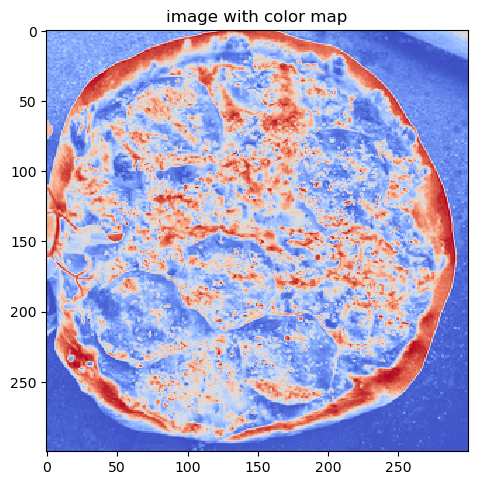

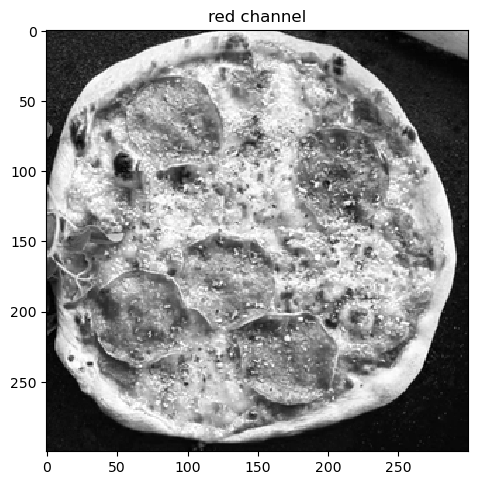

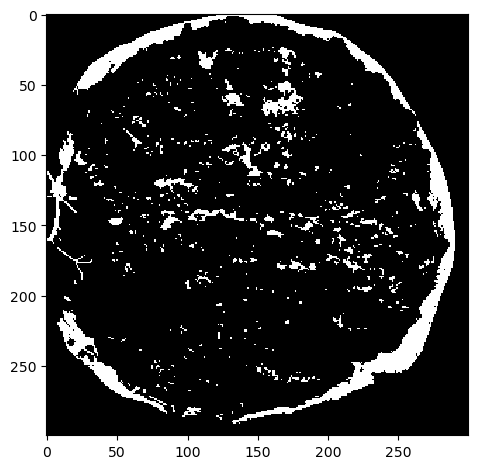

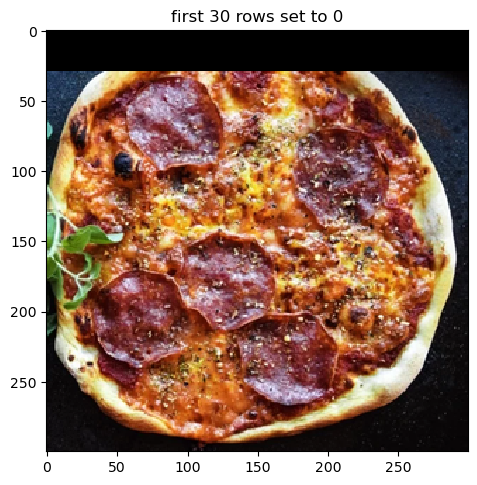

In [3]:
in_dir = "C:/Users/Admin/Documents/HCAI/IMAGE_ANALYSIS/past exams/spring 2023/data/PizzaPCA/training"
im_name = "/BigSausage.png"

# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
im_org = io.imread(
    in_dir + im_name
)  # im_org data type depends on the image format. usually jpg and png are uint8.

# rescale image
image_rescaled = rescale(im_org, 0.25, anti_aliasing=True, channel_axis=2)

# check dimensions and pixel type
print("image dimensions : ", im_org.shape)
print("pixel type : ", im_org.dtype)

# convert to gray scale
im_gray = color.rgb2gray(im_org)  # dataype = float64

# display image with color maps
io.imshow(
    im_gray, cmap="coolwarm"
)  # cool, hot, pink, copper, coolwarm, cubehelix, and terrain.
plt.title("image with color map")
io.show()

# display only one color channel of the image
im_org_r = im_org[
    :, :, 0
]  # extract all the x pixels, all the y pixels, and channel 0, that is Red
io.imshow(im_org_r)
plt.title("red channel")
io.show()

# display gray image with thresholds. doesn't work if data type is float64
normalized_im_gray = (im_gray * 255).astype(np.uint8)
# or
normalized_im_gray = img_as_ubyte(im_gray)

io.imshow(normalized_im_gray, vmin=100, vmax=200)
plt.title("gray scale image with thresholds")
io.show()

# mask: all pixels above the threshold are set to white
mask = normalized_im_gray > 200
io.imshow(mask)
io.show()

# rows form 0 to 30 are set to 0
im_org[:30] = 0
io.imshow(im_org)
plt.title("first 30 rows set to 0")
io.show()

## Histograms

- display frequency of pixel values in gray image
- display frequency of a channel in color image


In [4]:
# histogram of a gray scale image (float64)
plt.hist(im_gray.ravel(), bins=256, color="red", alpha=1.0)
plt.title("Image histogram")
io.show()

# histogram of a rgb image (uint8)
# extract a color channel, for example red
red_channel = im_org[:, :, 0].ravel()
h = plt.hist(red_channel, bins=256, color="red", alpha=0.7)
bin_number = 150
number_of_pixels = h[0][150]

## X-ray images and DICOM

- grey level profile of an x ray image
- read and display DICOM image


Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 174
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 61.7.148187188172271071649499494197343400503
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.34'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 61.7.148187188172271071649499494197343400503
(0008, 0020) Study Date                          DA: '20140914'
(0008, 0030) Study Time                          TM: ''
(0008, 0050) Accession N

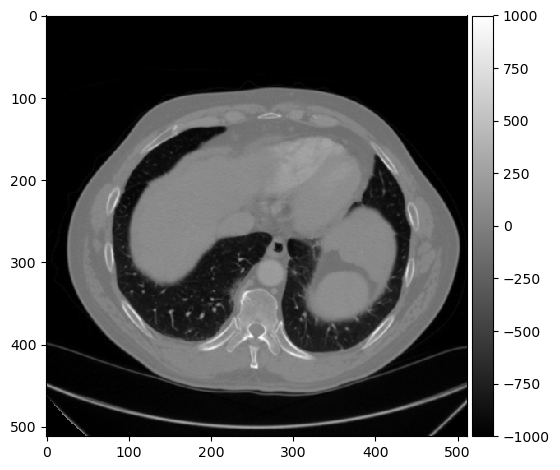

In [5]:
# grey level profile
im_org = io.imread(
    "C:/Users/Admin/Documents/HCAI/IMAGE_ANALYSIS/exercises/ex1-IntroductionToImageAnalysis/data/metacarpals.png"
)
p = profile_line(im_org, (342, 77), (320, 160))
plt.plot(p)
plt.ylabel("Intensity")
plt.xlabel("Distance along line")
plt.show()

# read and display dicom image
in_dir = "C:/Users/Admin/Documents/HCAI/IMAGE_ANALYSIS/exercises/ex1-IntroductionToImageAnalysis/data/"
im_name = "1-442.dcm"
ds = dicom.dcmread(in_dir + im_name)
print(ds)
im = ds.pixel_array
io.imshow(
    im, vmin=-1000, vmax=1000, cmap="gray"
)  # pixel values are stored as 16 bit integers and therefore it is necessary to specify which value range that should be mapped to the gray scale spectrum
io.show()

## PCA

- load txt dataset
- compute variance
- scatterplot matrix
- performing of PCA
- plot of explained variance, cumulative variance and data projected on the pcs


Number of features: 4 and number of observations: 50


<Figure size 640x480 with 0 Axes>

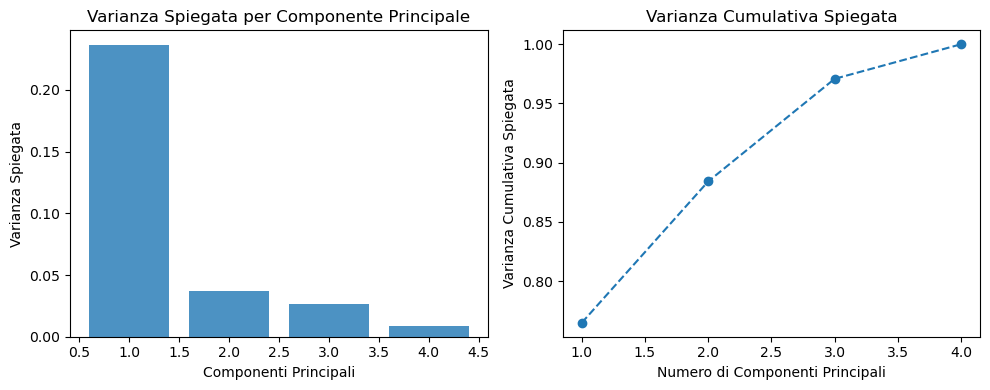

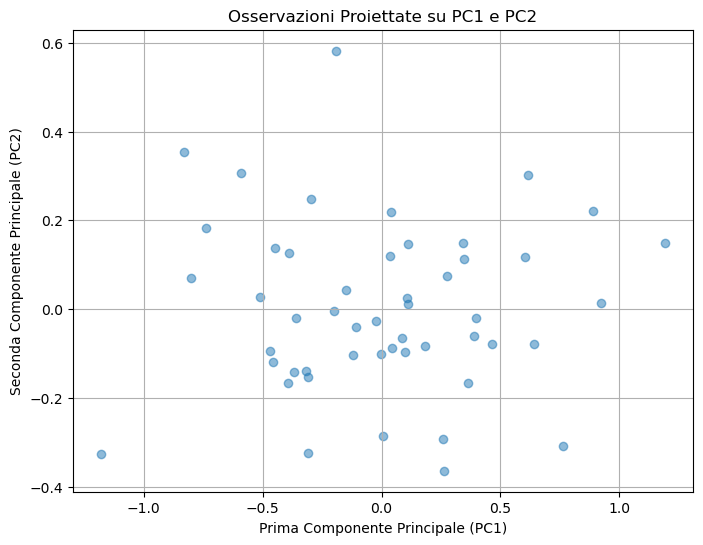

In [6]:
# load txt dataset
in_dir = "C:/Users/Admin/Documents/HCAI/IMAGE_ANALYSIS/exercises/ex1b-PCA/data/"
txt_name = "irisdata.txt"
iris_data = np.loadtxt(in_dir + txt_name, comments="%")
# x is a matrix with 50 rows and 4 columns
x = iris_data[0:50, 0:4]
n_feat = x.shape[1]
n_obs = x.shape[0]
print(f"Number of features: {n_feat} and number of observations: {n_obs}")

# compute variance for each feature
sep_l = x[:, 0]
sep_w = x[:, 1]
pet_l = x[:, 2]
pet_w = x[:, 3]
var_sep_l = sep_l.var(ddof=1)
var_sep_w = sep_w.var(ddof=1)
var_pet_l = pet_l.var(ddof=1)
var_pet_l = pet_w.var(ddof=1)


# display matrix of scatterplots of pair of features.
plt.figure()  # Added this to make sure that the figure appear
# Transform the data into a Pandas dataframe
d = pd.DataFrame(
    x, columns=["Sepal length", "Sepal width", "Petal length", "Petal width"]
)
sns.pairplot(d)
# plt.show()

# perform PCA
data = x  # deve essere di tipo numpy, non gli va bene un panda dataframe
pca = decomposition.PCA()
pca.fit(data)
values_pca = pca.explained_variance_
exp_var_ratio = pca.explained_variance_ratio_
vectors_pca = pca.components_  # vector of the principal components

data_transform = pca.transform(
    data
)  # proietta i dati (in questo caso non normalizzati, lungo le componenti principali)

# Plot delle varianze spiegate
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.bar(range(1, len(values_pca) + 1), values_pca, alpha=0.8, align="center")
plt.xlabel("Componenti Principali")
plt.ylabel("Varianza Spiegata")
plt.title("Varianza Spiegata per Componente Principale")

# Plot della varianza cumulativa
plt.subplot(1, 2, 2)
plt.plot(
    range(1, len(exp_var_ratio) + 1),
    np.cumsum(exp_var_ratio),
    marker="o",
    linestyle="--",
)
plt.xlabel("Numero di Componenti Principali")
plt.ylabel("Varianza Cumulativa Spiegata")
plt.title("Varianza Cumulativa Spiegata")

plt.tight_layout()
plt.show()

# Plot delle osservazioni proiettate lungo le prime due PC
plt.figure(figsize=(8, 6))
plt.scatter(data_transform[:, 0], data_transform[:, 1], alpha=0.5)
plt.xlabel("Prima Componente Principale (PC1)")
plt.ylabel("Seconda Componente Principale (PC2)")
plt.title("Osservazioni Proiettate su PC1 e PC2")
plt.grid(True)
plt.show()

# Worksheet 2

## Camera and Lenses
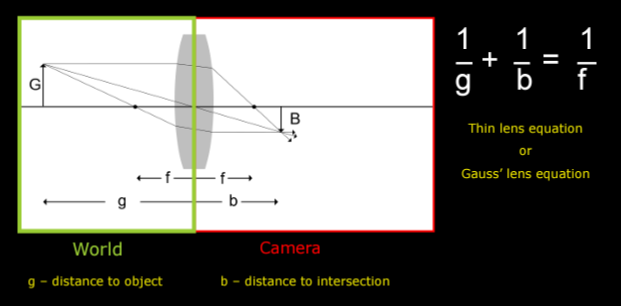 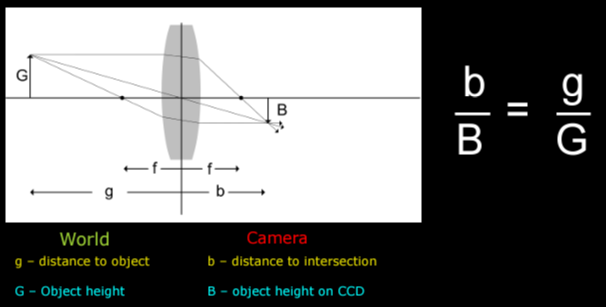

- find camera distance b given object distance g and focal length f
- find object height in the camera (B) given b,g,G
- size of a single pixel on the CCD chip
- height (G) on the ccd chip
- horizontal field-of-view (in degrees)
- vertical field-of-view (in degrees)


In [7]:
import math

#camera_b_distance returns the distance (b) where the CCD should be placed
#when the object distance (g) and the focal length (f) are given
def camera_b_distance(f, g):
    b = 1 / (f**(-1) - g**-(1))
    return b

#find object height in the camera (B) given b,g,G
b = 5 #mm
g = 4 * 1e3 #mm
G = 1.80 * 1e3 #mm

B = (b*G) / g

# size of a single pixel on the CCD chip (in mm)
ccd_pixel_height = 480
height_half = ccd_pixel_height / 2
pixel_size = G/240

#height on the ccd chip
h = G/pixel_size

#horizontal fov
FOV_x = 2*math.atan2(3.2e-3, b)*180/math.pi

#vertical fov
FOV_y = 2*math.atan2(2.4e-3, b)*180/math.pi


# Worksheet 3


## Imports and Images loading


In [8]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import img_as_float
from skimage.util import img_as_ubyte
from skimage.filters import threshold_otsu
from skimage import color

In [9]:
# Directory containing data and images
in_dir = "data/"
im_name = "vertebra.png"
im_org = io.imread(in_dir + im_name)

FileNotFoundError: No such file: 'c:\Users\Admin\Documents\GitHub\02502-Image-Analysis-Cheatsheet\data\vertebra.png'

## Conversions

- Convert from unsigned byte to float images
- Convert from float to unsigned byte images


In [ ]:
# byte to float
im_float = img_as_float(im_org)

# float to unsigned byte
im_ubyte = img_as_ubyte(im_float)

## Histogram stretching

- Linear histogram **stretching** of a grey level image.
- Gamma mapping **stretching** of a grey level image.


In [ ]:
def histogram_stretch(img_in):
    """
    Stretches the histogram of an image
    :param img_in: Input image
    :return: Image, where the histogram is stretched so the min values is 0 and the maximum value 255
    """
    # img_as_float will divide all pixel values with 255.0
    img_float = img_as_float(img_in)
    min_val = img_float.min()
    max_val = img_float.max()
    min_desired = 0.0
    max_desired = 1.0

    # ==============================================
    # DO SOMETHING HERE
    # ==============================================

    img_out = (
        (img_float - min_val) * (max_desired - min_desired) / (max_val - min_val)
    ) + min_desired
    # img_as_ubyte will multiply all pixel values with 255.0 before converting to unsigned byte
    return img_as_ubyte(img_out)

In [ ]:
def gamma_map(img_in, gamma):
    """
    Stretches the histogram of an image
    :param img_in: Input image
    :param gamma: Exponent
    :return: Gamma-mapped image
    """
    img_float = img_as_float(img_in)
    img_out = np.power(img_float, gamma)
    return img_as_ubyte(img_out)

## Image tresholding

- Basic
- Otsu tresholding


In [ ]:
# Basic treshold
def threshold_image(img_in, thres):
    """
    Apply a threshold in an image and return the resulting image
    :param img_in: Input image
    :param thres: The treshold value in the range [0, 255]
    :return: Resulting image (unsigned byte) where background is 0 and foreground is 255
    """
    mask = img_in > thres
    return img_as_ubyte(mask)

In [ ]:
# Otsu treshold
thres_new = threshold_otsu(im_org)
im_thres = threshold_image(im_org, thres=thres_new)

## Color thresholding in the RGB color space

- Example function dtu sign


In [ ]:
def detect_dtu_signs(img_in, sign):
    """
    Detects signs of a specified color in the input image.

    Parameters
    ----------
    img_in : ndarray
        Input image as an ndarray.
    sign : str
        Color of the sign to detect. Possible values: 'red', 'blue'.

    Returns
    -------
    ndarray
        Binary mask of the detected sign in the input image.

    Description
    -----------
    This function detects signs of a specified color ('red' or 'blue') in the input image.
    For 'red' signs, it segments the image based on certain red color thresholds in the
    red, green, and blue components. For 'blue' signs, it uses specific blue color
    thresholds in the RGB components to create a binary mask representing the detected sign.
    The output is a binary mask indicating the detected sign in the input image.
    """

    # Extract individual color components
    r_comp = img_in[:, :, 0]
    g_comp = img_in[:, :, 1]
    b_comp = img_in[:, :, 2]

    # Detect 'red' signs based on specified thresholds
    if sign == "red":
        segm = (
            (r_comp > 160)
            & (r_comp < 180)
            & (g_comp > 50)
            & (g_comp < 80)
            & (b_comp > 50)
            & (b_comp < 80)
        )

    # Detect 'blue' signs based on specified thresholds
    if sign == "blue":
        segm = (
            (r_comp < 10)
            & (g_comp > 85)
            & (g_comp < 105)
            & (b_comp > 180)
            & (b_comp < 200)
        )

    return img_as_ubyte(segm)

## Color thresholding in the HSV color space

- Separate and divide in the 2 HSV channel


In [ ]:
# Separate the different channel (HUE and VALUE channels)
hsv_img = color.rgb2hsv(im_org)
hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]

# Actual segmentation
segm_blue = (hue_img < 0.6) & (hue_img > 0.4) & (value_img < 0.77) & (value_img > 0.70)
segm_red = (hue_img < 1.0) & (hue_img > 0.9)

NameError: name 'color' is not defined

# Worksheet 4a-4b

NOTE:

**Mean Filter:**

- **Effect:** Reduces noise and blurs the image.
- **Operation:** Computes the average of pixel values in a defined window.
- **Use:** Suitable for images with uniform or mild noise.

**Median Filter:**

- **Effect:** Reduces noise without blurring edges.
- **Operation:** Replaces each pixel value with the median of pixel values in its window.
- **Use:** Effective in removing impulse or "salt and pepper" noise.

**Gaussian Filter:**

- **Effect:** Reduces noise and blurs the image.
- **Operation:** Applies a Gaussian kernel to weight surrounding pixels more significantly than those farther away.
- **Use:** Useful for noise reduction and blurring while maintaining a gradual transition between pixels.


## Imports

In [ ]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import correlate
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import pydicom as dicom
import seaborn as sns
import pandas as pd
from sklearn import decomposition
from skimage.filters import median
from skimage.filters import gaussian

from skimage.filters import prewitt_h
from skimage.filters import prewitt_v
from skimage.filters import prewitt

from skimage.util import img_as_ubyte, img_as_float
from mpl_toolkits.axes_grid1 import make_axes_locatable

from skimage.filters import threshold_otsu
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk 

## Filtering using correlation
- basic correlation on a gray scale image
- correlation with mode reflect
- correlation with mode constant

In [ ]:
in_dir = "C:/Users/Admin/Documents/HCAI/IMAGE_ANALYSIS/exercises/ex4-ImageFiltering/data/"
im_name = "Gaussian.png"

im_org = io.imread(in_dir+im_name)
weights = [[0, 1, 0],
		   [1, 5, 1],
		   [0, 1, 0]]
           

fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (20,5))
ax[0].imshow(im_org, cmap = "gray")
ax[0].set_title("original image")
ax[1].imshow(res_img, cmap = "gray")
ax[1].set_title("correlation result")
ax[2].imshow(reflection_img, cmap = "gray")
ax[2].set_title("correlation with mode = reflection")
ax[3].imshow(constant_img, cmap = "gray")
ax[3].set_title("correlation with mode = constant")

NameError: name 'res_img' is not defined

## Mean filtering

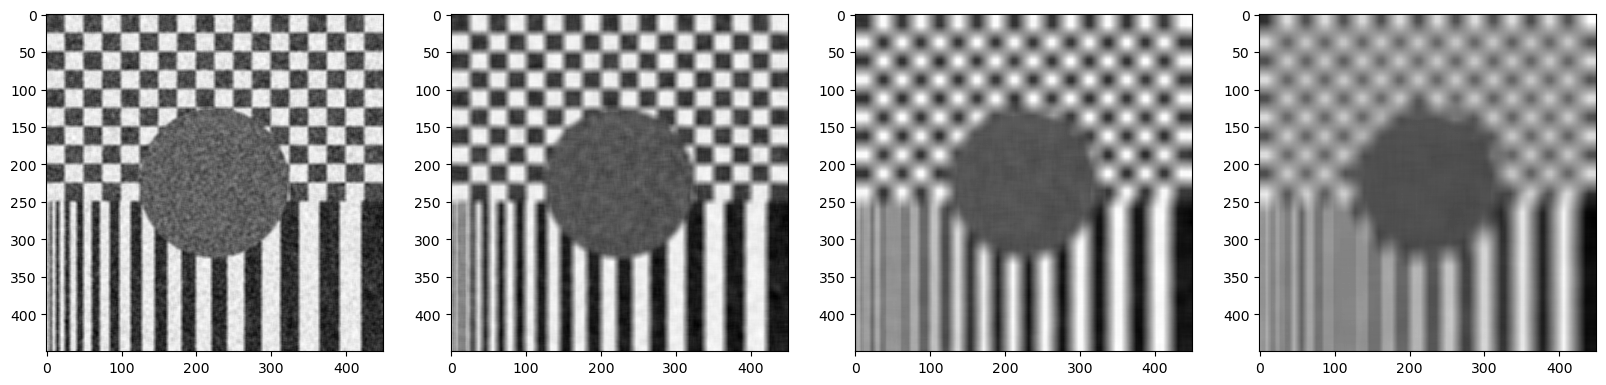

In [ ]:
def apply_mean_filter(img, size):
    weights = np.ones([size, size])
    weights = weights / np.sum(weights)

    out_img = correlate(img, weights, mode='reflect')
    return out_img

gauss5 = apply_mean_filter(im_org, size = 5)
gauss10 = apply_mean_filter(im_org, size = 10)
gauss20 = apply_mean_filter(im_org, size = 20)
gauss40 = apply_mean_filter(im_org, size = 30)

fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 5))
ax[0].imshow(gauss5, cmap = 'gray')
ax[1].imshow(gauss10, cmap = 'gray')
ax[2].imshow(gauss20, cmap = 'gray')
ax[3].imshow(gauss40, cmap = 'gray')
plt.show()

## Median Filtering

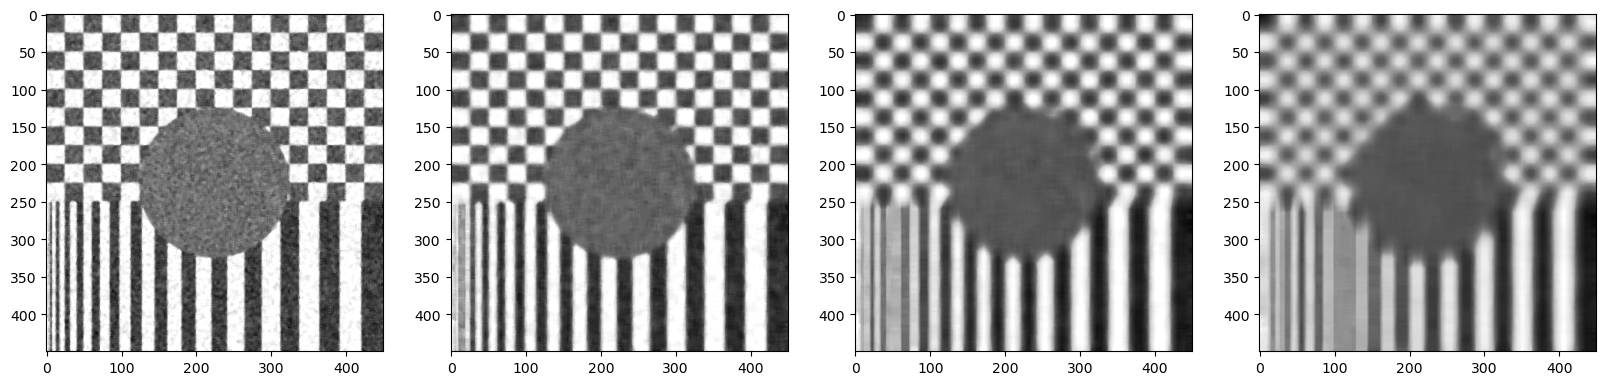

In [ ]:
def apply_median_filter(img, size):
    footprint = np.ones([size, size])
    med_img = median(img, footprint)
    return med_img

median5 = apply_median_filter(im_org, size = 5)
median10 = apply_median_filter(im_org, size = 10)
median20 = apply_median_filter(im_org, size = 20)
median40 = apply_median_filter(im_org, size = 30)

fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 5))
ax[0].imshow(median5, cmap = 'gray')
ax[1].imshow(median10, cmap = 'gray')
ax[2].imshow(median20, cmap = 'gray')
ax[3].imshow(median40, cmap = 'gray')
plt.show()

### Compare mean and median filtering

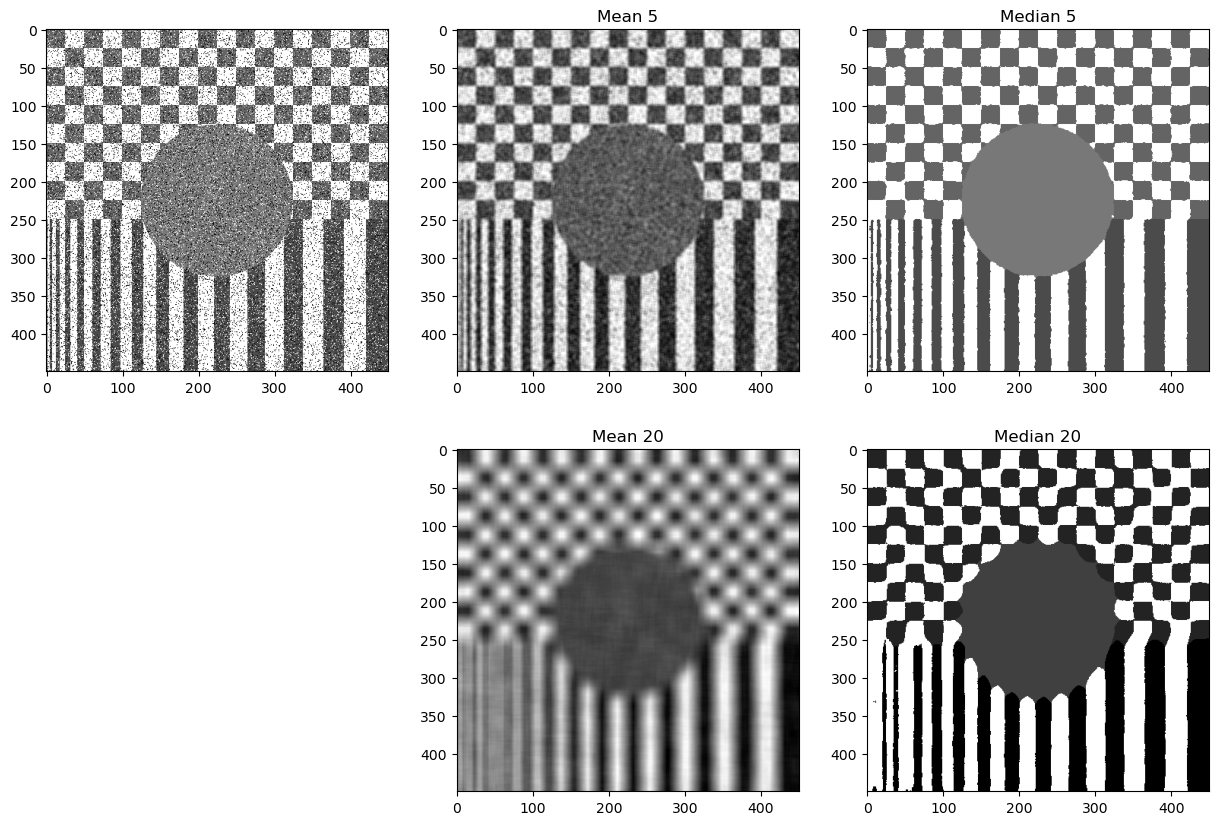

In [ ]:
img_org = io.imread('C:/Users/Admin/Documents/HCAI/IMAGE_ANALYSIS/exercises/ex4-ImageFiltering/data/SaltPepper.png')
mean5 = apply_mean_filter(img_org, size = 5)
median5 = apply_median_filter(img_org, size = 5)
mean20 = apply_mean_filter(img_org, size =20)
median20 = apply_median_filter(img_org, size = 20)

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 10))
ax[0,0].imshow(img_org, cmap = 'gray')
ax[0,1].imshow(mean5, cmap = 'gray')
ax[0,1].set_title('Mean 5')
ax[0,2].imshow(median5, cmap = 'gray')
ax[0,2].set_title('Median 5')
ax[1,0].set_axis_off()
ax[1,1].imshow(mean20, cmap = 'gray')
ax[1,1].set_title('Mean 20')
ax[1,2].imshow(median20, cmap = 'gray')
ax[1, 2].set_title('Median 20')
plt.show()

## Gaussian Filter

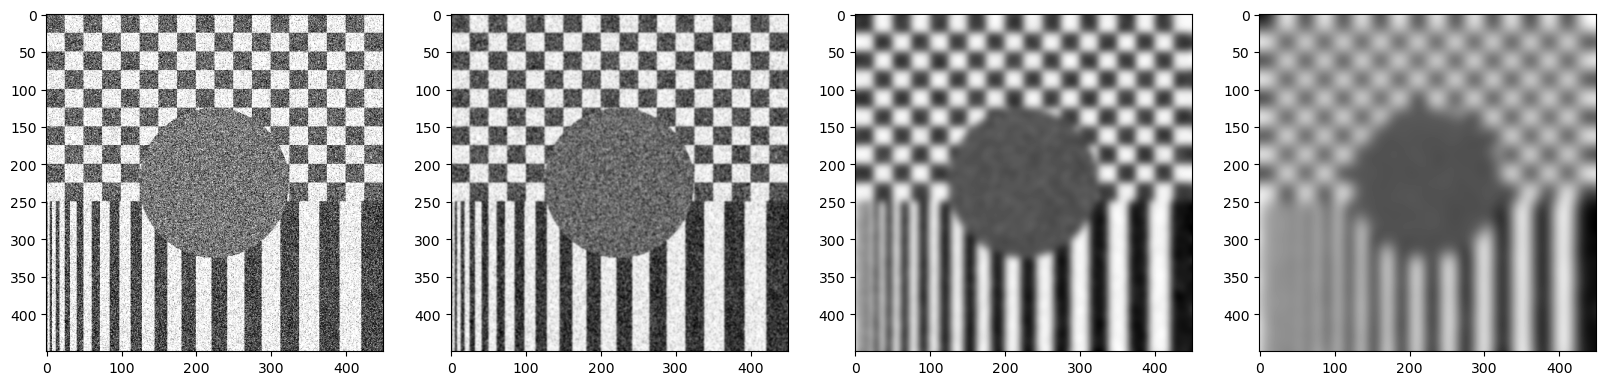

In [ ]:
img_gauss = io.imread('C:/Users/Admin/Documents/HCAI/IMAGE_ANALYSIS/exercises/ex4-ImageFiltering/data/Gaussian.png')

gauss1 = gaussian(img_gauss, 1)
gauss5 = gaussian(img_gauss, 5)
gauss10 = gaussian(img_gauss, 10)

fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 5))
ax[0].imshow(img_gauss, cmap = 'gray')
ax[1].imshow(gauss1, cmap = 'gray')
ax[2].imshow(gauss5, cmap = 'gray')
ax[3].imshow(gauss10, cmap = 'gray')
plt.show()

    


## Edge Filters
- Prewitt horizontal filter (detect changes along horizontal directions)
- Prewitt vertical filter (detect changes along vertical directions)
- Complete Prewitt filter
- Increase edges thickness

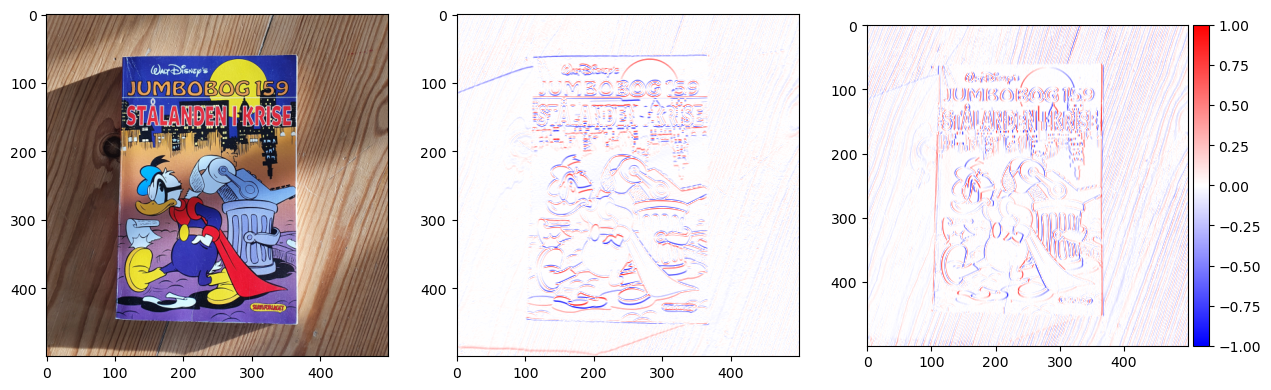

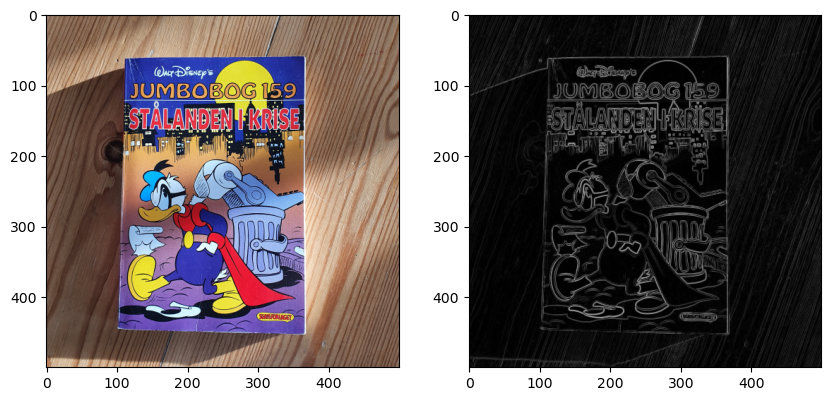

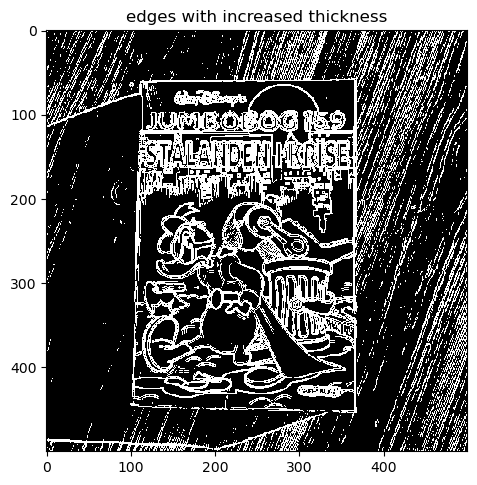

In [ ]:
img_org = io.imread('C:/Users/Admin/Documents/HCAI/IMAGE_ANALYSIS/past exams/fall_2021/Donald/donald_1.png')
img_gray = color.rgb2gray(img_org)
img_h = prewitt_h(img_gray)
img_v = prewitt_v(img_gray)

#prewitt horizontal
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))
ax[0].imshow(img_org)
ax[1].imshow(img_h, cmap = 'bwr', vmin = -1, vmax = 1)

#prewitt vertical
im = ax[2].imshow(img_v, cmap = 'bwr', vmin = -1, vmax = 1)
divider = make_axes_locatable(ax[2])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.show()

#complete prewitt
img_prewitt = prewitt(img_gray)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
ax[0].imshow(img_org)
ax[1].imshow(img_prewitt, cmap = 'gray', vmin = 0, vmax = 1)
plt.show()

#increase edges thickness
thresh = 0.09
edges = img_prewitt > thresh
io.imshow(edges)
plt.title("edges with increased thickness")
io.show()


## Image Morphology on a single object
Morphological operations are applied to the region with "True" (for boolean images). In other words, morphological operations are applied to the white areas in the binary image.
- function to compare plots
- threshold using otsu
- erosion (shrinks the boundaries of objects in a binary image. It decreases the size of the foreground region.)
- dilation (expands the boundaries of objects in a binary image. It increases the size of the foreground region.)
- opening (erosion operation followed by a dilation operation. It is useful for removing noise and small objects from an image.)
- closing (dilation operation followed by an erosion operation. It is effective in closing small holes and gaps in the foreground.)



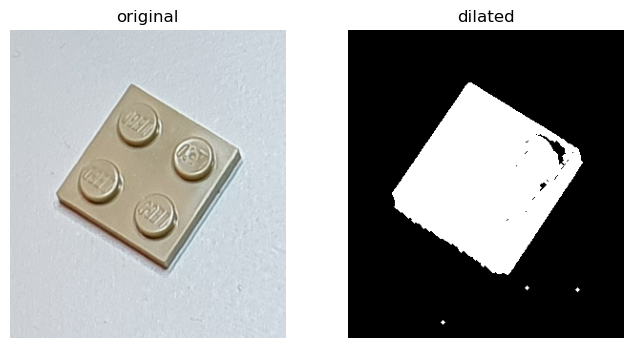

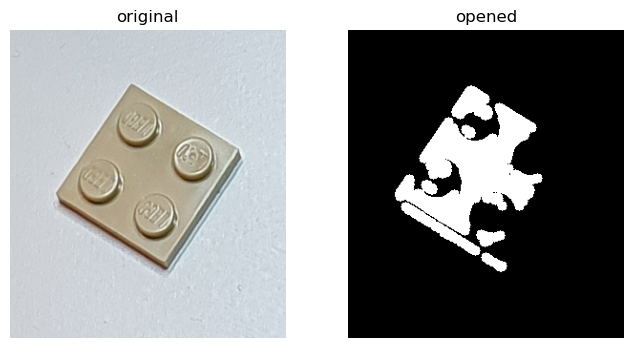

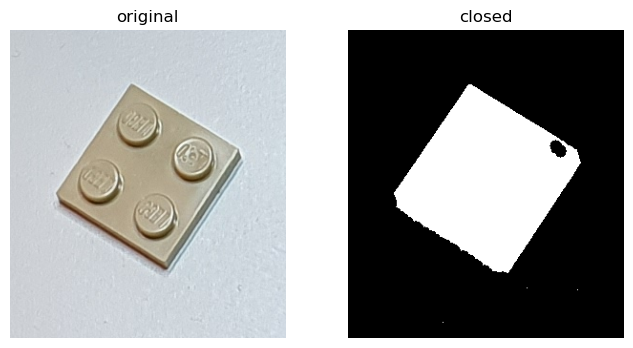

In [ ]:

# From https://scikit-image.org/docs/stable/auto_examples/applications/plot_morphology.html
def plot_comparison(original, filtered, filter_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    io.show()



#threshold using otsu
im_org = io.imread('C:/Users/Admin/Documents/HCAI/IMAGE_ANALYSIS/exercises/ex4b-ImageMorphology/data/lego_5.png')
im_gray = color.rgb2gray(im_org)

thres = threshold_otsu(im_gray)
bin_img = im_gray < thres # The ROI is usually with 
plot_comparison(im_org, bin_img, 'Binary image')

#erosion (binary image is needed!!)
footprint = disk(2)
eroded = erosion(bin_img, footprint)
plot_comparison(im_org, eroded, "eroded")

#dilation
footprint = disk(2)
dilated = dilation(bin_img, footprint)
plot_comparison(im_org, dilated, "dilated")

#opening
footprint = disk(5)
opened = opening(bin_img, footprint)
plot_comparison(im_org, opened, "opened")

#closing
footprint = disk(5)
closed = closing(bin_img, footprint)
plot_comparison(im_org, closed, "closed")

## Object Outline
object outline = (opening) + closing + dilation + logical xor

- object outline on a single object
- object outline on multiple objects


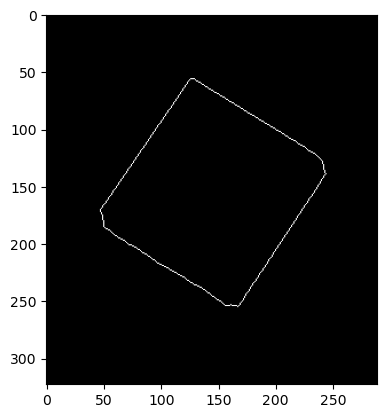

In [ ]:
footprint = disk(1)
opened = opening(bin_img, disk(1))
closed = closing(opened, disk(15))
dilated = dilation(closed, disk(1))
outline = np.logical_xor(dilated, closed)
plt.imshow(outline, cmap = 'gray')
plt.show()

## Blob classification

- Remove border BLOBs
- Cleaning using morphological operations
- Visualize found labels
- Exploring BLOB features: blob circularuty, area and perimeter
- cell_counting function (summary of all the worksheet)


In [ ]:
# Binary image from original image

in_dir = "data/"
im_org = io.imread(f"{in_dir}lego_4_small.png")
im_gray = color.rgb2gray(im_org)
thres = threshold_otsu(im_gray)
im_bin = im_gray < thres

show_comparison(im_org, im_bin, "Binary image")

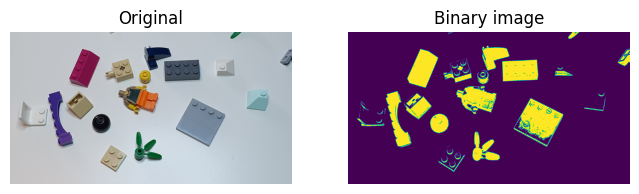


In [ ]:
# Remove border BLOBs

im_process = segmentation.clear_border(im_bin)

In [ ]:
# Cleaning using morphological operations
# In order to remove remove noise and close holes, you should do a morphological closing followed by a morphological opening
# with a disk shaped structuring element with radius 5

footprint = morphology.disk(5)
im_process = morphology.binary_closing(im_process, footprint)
im_open = morphology.binary_opening(im_process, footprint)

In [ ]:
# Find labels
# The actual connected component analysis / BLOB analysis is performed using measure.label

label_img = measure.label(im_open)
n_labels = label_img.max()
print(f"Number of labels: {n_labels}")

In [ ]:
# Visualize found labels
# We can use the function label2rbg to create a visualization of the found BLOBS.

im_blob = label2rgb(label_img)
show_comparison(im_org, im_blob, "BLOBS")

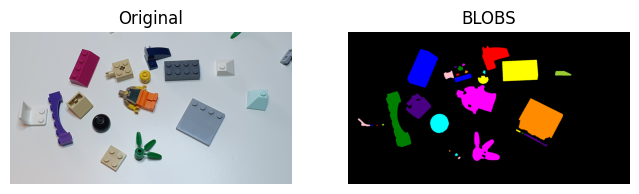


In [ ]:
# Compute BLOB features
# It is possible to compute a wide variety of BLOB features using the measure.regionprops function

region_props = measure.regionprops(label_img)
areas = np.array([prop.area for prop in region_props])
plt.hist(areas, bins=50)
plt.show()

The goal of this part of the exercise, is to create a small program that can automatically count the number of cell nuclei in an image.


In [ ]:
## cell image
# avoid bin with value 0 due to the very large number of background pixels
plt.hist(img_gray.ravel(), bins=256, range=(1, 100))
io.show()

thres = threshold_otsu(img_gray)
img_bin = img_gray > thres
show_comparison(img_gray, img_bin, "binary")

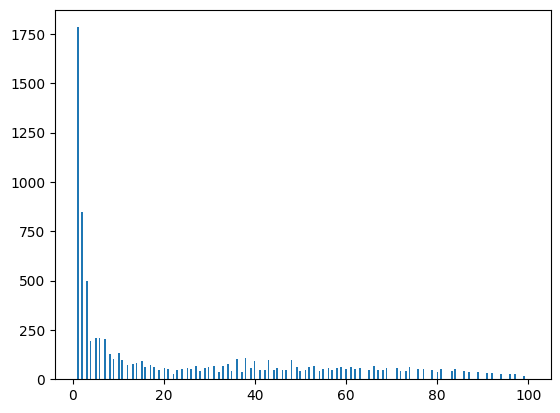
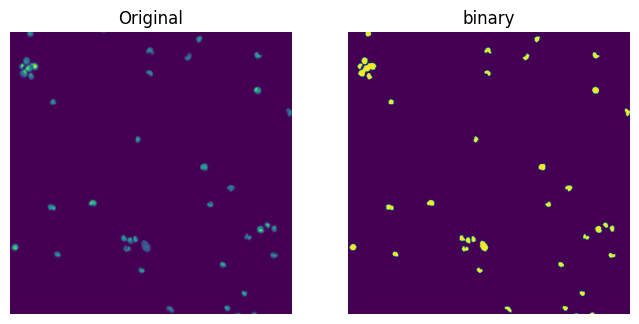


In [ ]:
# Select a minimum and maximum allowed area and use the following to visualise the result:

min_area = 10
max_area = 150

# Create a copy of the label_img
label_img_filter = label_img
for region in region_props:
    # Find the areas that do not fit our criteria
    if region.area > max_area or region.area < min_area:
        # set the pixels in the invalid areas to background
        for cords in region.coords:
            label_img_filter[cords[0], cords[1]] = 0
# Create binary image from the filtered label image
i_area = label_img_filter > 0
show_comparison(img_small, i_area, "Found nuclei based on area")

In [ ]:
def circularity(area, perimeter):
    """
    You may get values larger than 1 because
    we are in a "discrete" (pixels) domain. Check:

    CIRCULARITY OF OBJECTS IN IMAGES, Botterma, M.J. (2000)
    https://core.ac.uk/download/pdf/14946814.pdf
    """
    f_circ = (4 * np.pi * area) / (perimeter**2)
    return f_circ


circs = circularity(areas, perimeters)

In [ ]:
def cell_counting(img_gray, min_area=10, max_area=150, min_circ=0.7):
    # Binarization
    thres = threshold_otsu(img_gray)
    img_bin = img_gray > thres
    img_c_b = segmentation.clear_border(img_bin)

    # Label image
    label_img = measure.label(img_c_b)

    # Extract properties
    region_props = measure.regionprops(label_img)

    # Number of blobs
    n_nuclei = len(region_props)

    # Filter the label image
    label_img_filter = label_img.copy()
    for region in region_props:
        circ = circularity(region.area, region.perimeter)
        # Find the areas that do not fit our criteria
        if region.area > max_area or region.area < min_area or circ < min_circ:
            # set the pixels in the invalid areas to background
            n_nuclei = n_nuclei - 1
            for cords in region.coords:
                label_img_filter[cords[0], cords[1]] = 0

    # Create binary image from the filtered label image
    i_area = label_img_filter > 0

    return i_area, n_nuclei

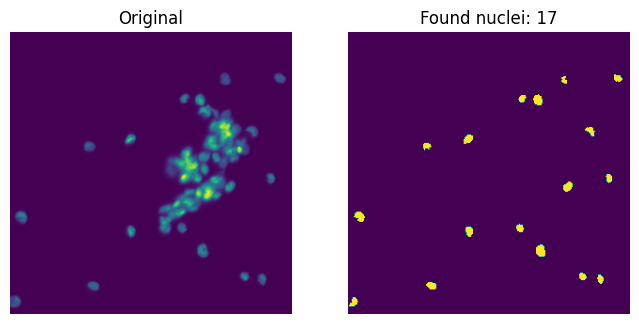


# Worksheet 6

## Imports and previous stuff

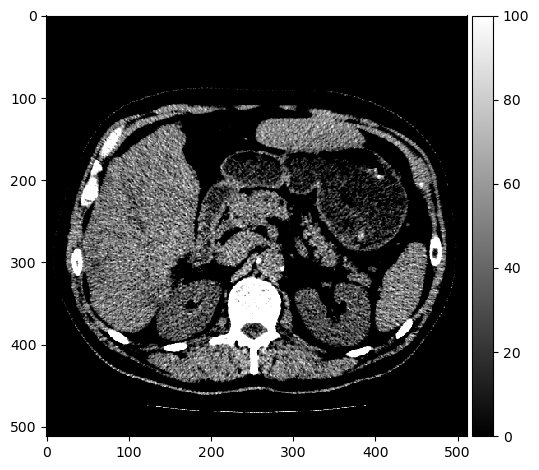

In [ ]:
from skimage import io, color
from skimage.morphology import binary_closing, binary_opening
from skimage.morphology import disk
import matplotlib.pyplot as plt
import numpy as np
from skimage import measure
from skimage.color import label2rgb
import pydicom as dicom
from scipy.stats import norm
from scipy.spatial import distance

def show_comparison(original, modified, modified_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap="gray", vmin=-200, vmax=500)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(modified)
    ax2.set_title(modified_name)
    ax2.axis('off')
    io.show()


ct = dicom.read_file('C:/Users/Admin/Documents/HCAI/IMAGE_ANALYSIS/exercises/ex6-PixelClassificationAndObjectSegmentation/data/Training.dcm')
img = ct.pixel_array
io.imshow(img, vmin=0, vmax=100, cmap='gray')
io.show()

## Preliminar Analysis of one CT scan
- mask of the CT image with expert annotations
- fit a gaussian distribution to some values of the CT image
- plot multiple gaussians in the same figure

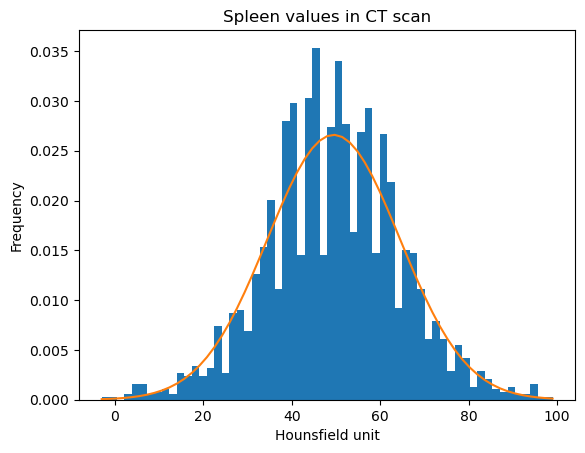

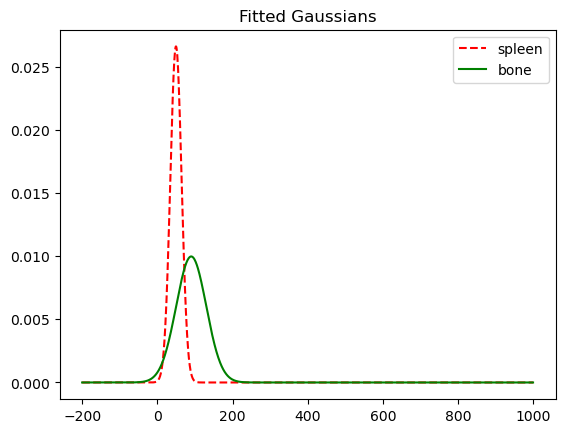

In [ ]:
#mask of the CT image
spleen_roi = io.imread('C:/Users/Admin/Documents/HCAI/IMAGE_ANALYSIS/exercises/ex6-PixelClassificationAndObjectSegmentation/data/SpleenROI.png')
# convert to boolean image
spleen_mask = spleen_roi > 0 #white values
spleen_values = img[spleen_mask] #spleen values contain the HU values (HU values are the pixel value for DICOM images, )

#fit a gaussian
mu_spleen = np.mean(spleen_values)
std_spleen = np.std(spleen_values)
n, bins, patches = plt.hist(spleen_values, 60, density=1)
pdf_spleen = norm.pdf(bins, mu_spleen, std_spleen)
plt.plot(bins, pdf_spleen)
plt.xlabel('Hounsfield unit')
plt.ylabel('Frequency')
plt.title('Spleen values in CT scan')
plt.show()

#plor multiple gaussians in the same figure
# Hounsfield unit limits of the plot
min_hu = -200
max_hu = 1000
mu_bone = 90
std_bone = 40
hu_range = np.arange(min_hu, max_hu, 1.0)
pdf_spleen = norm.pdf(hu_range, mu_spleen, std_spleen)
pdf_bone = norm.pdf(hu_range, mu_bone, std_bone)
plt.plot(hu_range, pdf_spleen, 'r--', label="spleen")
plt.plot(hu_range, pdf_bone, 'g', label="bone")
plt.title("Fitted Gaussians")
plt.legend()
plt.show()


## Minimum Distance pixel classification
In the minimum distance classifier the pixel value class ranges are defined using the average values of the training values. If you have two classes, the threshold between them is defined as the mid-point between the two class value averages.

1. compute mean of the values of each class
2. set the thresholds (background threshold is set manually)
3. compute the images results
4. display the images combined

In [ ]:
#compute the mean of the values of each class
soft_tissue_mean = np.mean(vals_soft_tissue)
bone_mean = np.mean(values[0])
fat_mean = np.mean(values[1])

print(f'Soft tissue mean: {soft_tissue_mean} - Bone mean: {bone_mean} - Fat mean: {fat_mean}')

#compute the thresholds
t_background = -200 #decided by me
t_fat_soft = (soft_tissue_mean + fat_mean)/2
t_bone_soft = (soft_tissue_mean + bone_mean)/2

#compute the images
fat_img = (img > t_background) & (img <= t_fat_soft)
soft_img = (img > t_fat_soft) & (img <= t_bone_soft)
bone_img = (img > t_bone_soft) & (img <= 1000)

#display the images
label_img = fat_img + 2 * soft_img + 3 * bone_img
image_label_overlay = label2rgb(label_img)
show_comparison(img, image_label_overlay, 'Classification result')


## Parametric pixel classification
In the parametric classifier, the standard deviation of the training pixel values is also used when determinin the class ranges.

1. inspect the fitted gaussian and find the intersection between the curves
2. set the thresholds using the values found in the previous point (background threshold is set manually)
3. compute the images results
4. display the images combined

In [ ]:
#inspect the fitted gaussians and find the intersections
# Automatic intersection Fat - Soft
for test_value in np.linspace(mu_fat, mu_soft, 1000):
    if norm.pdf(test_value, mu_soft, std_soft) > norm.pdf(test_value, mu_fat, std_fat):
        thres_fat_soft = test_value
        print(f"Fat - Soft threshold: {thres_fat_soft}")
        break

# Automatic intersection Soft - Bone
for test_value in np.linspace(mu_soft, mu_bone, 1000):
    if norm.pdf(test_value, mu_bone, std_bone) > norm.pdf(test_value, mu_soft, std_soft):
        thres_soft_bone = test_value
        print(f"Soft - Bone threshold: {thres_soft_bone}")
        break

#compute the images
fat_img = (img > t_background) & (img <= thres_fat_soft)
soft_img = (img > thres_fat_soft) & (img <= thres_soft_bone)
bone_img = (img > thres_soft_bone) & (img <= 1000)

#display the images
label_img = fat_img + 2 * soft_img + 3 * bone_img
image_label_overlay = label2rgb(label_img)
show_comparison(img, image_label_overlay, 'Classification result')


## Spleen Finder 

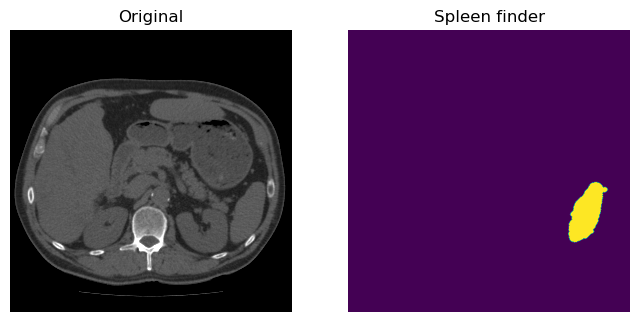

In [ ]:
def spleen_finder(img):
    t_1, t_2 = 20, 80
    spleen_estimate = (img > t_1) & (img < t_2)

    footprint = disk(2)
    closed = binary_closing(spleen_estimate, footprint)
    footprint = disk(4)
    opened = binary_opening(closed, footprint)

    label_img = measure.label(opened)
    region_props = measure.regionprops(label_img)

    min_area = 2000
    max_area = 10000
    min_perimeter = 100
    max_perimeter = 350

    # Create a copy of the label_img
    label_img_filter = label_img.copy()
    for region in region_props:
        # Find the areas that do not fit our criteria
        crit1 = region.area > max_area or region.area < min_area
        crit2 = region.perimeter > max_perimeter or region.perimeter < min_perimeter
        if crit1 or crit2:
            # set the pixels in the invalid areas to background
            for cords in region.coords:
                label_img_filter[cords[0], cords[1]] = 0
    
    # Create binary image from the filtered label image
    i_area_perimeter = label_img_filter > 0
    
    return i_area_perimeter

spleen_estimate = spleen_finder(img)
show_comparison(img, spleen_estimate, 'Spleen finder')

## DICE score
The DICE score (also called the DICE coefficient or the DICE distance) is a standard method of comparing one segmentation with another segmentation.
If segmentation one is called X and the second segmentation called Y. The DICE score is computed as




In [ ]:
ground_truth_img = io.imread('C:/Users/Admin/Documents/HCAI/IMAGE_ANALYSIS/exercises/ex6-PixelClassificationAndObjectSegmentation/data/Validation1_spleen.png')
gt_bin = ground_truth_img > 0
dice_score = 1 - distance.dice(spleen_estimate.ravel(), gt_bin.ravel())
print(f"DICE score {dice_score}")

DICE score 0.9565613955079239


## Imports and data preparation


In [ ]:
import matplotlib.pyplot as plt
import math
import numpy as np
import skimage.io as io
from skimage.util import img_as_float, img_as_uint
from skimage.transform import rotate
from skimage.transform import EuclideanTransform
from skimage.transform import SimilarityTransform
from skimage.transform import warp
from skimage.transform import swirl
from skimage.transform import matrix_transform

## Geometric transformations on images

- Rotation with and without anchor point
- Euclidean image transformation (Rotate and traslate)
- Similarly image transformation (Rotate, traslate and scale)
- Swirl image transformation (make a twist in the image)


In [ ]:
def show_comparison(original, transformed, transformed_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True, sharey=True)
    ax1.imshow(original)
    ax1.set_title("Original")
    ax1.axis("off")
    ax2.imshow(transformed)
    ax2.set_title(transformed_name)
    ax2.axis("off")
    io.show()

### Image rotation


In [ ]:
# Image rotation NO anchor point

rotation_angle = 10
rotated_img = rotate(im_org, rotation_angle)
show_comparison(im_org, rotated_img, "Rotated image")

In [ ]:
# Image rotation WITH anchor point

rot_center = [0, 0]
rotated_img = rotate(im_org, rotation_angle, center=rot_center)
show_comparison(im_org, rotated_img, "Rotated image")

In [ ]:
# Image rotation wiht mode
# mode="reflect" -> riflette la parte più vicina come sfondo
# mode="constant", cval=1  -> mette un colore a piacere (1=bianco)
# mode="wrap"  -> mette la parte opposta dell'immagine

rotated_img = rotate(im_org, rotation_angle, mode="reflect")
show_comparison(im_org, rotated_img, "Rotated image")

In [ ]:
# resize="True" -> lascia invaraite le dimensioni della foto, quindi aumenta il quadrato che la circonda

rotated_img = rotate(im_org, rotation_angle, resize=True)
show_comparison(im_org, rotated_img, "Rotated image")

### Euclidean image transformation


In [ ]:
# angle in radians - counter clockwise
rotation_angle = 10.0 * math.pi / 180.0
trans = [10, 20]
# EuclideanTransform returns a matrix with parameters for euclidean transformation. ROTATION AND TRASLATION
tform = EuclideanTransform(rotation=rotation_angle, translation=trans)
print(tform.params)

# deformation of the image, warp applies the tform (linear in this case) to the image
transformed_img = warp(im_org, tform)
show_comparison(im_org, transformed_img, "Rigid transformation image")

### Similarity transform of image


In [ ]:
rotation_angle = 15.0 * math.pi / 180.0
trans = [40, 30]
scale = 0.6
# Same as the Euclidean but with ROTATION, TRASLATION AND SCALE
tform = SimilarityTransform(scale=scale, rotation=rotation_angle, translation=trans)

recovered_img = warp(transformed_img, tform)
show_comparison(im_org, recovered_img, "Similarity transformation")

### The swirl image transformation


In [ ]:
str = 10
rad = 300
c = [500, 400]
# Swirl make a spiral in the immage with these parameters
swirl_img = swirl(im_org, strength=str, radius=rad, center=c)
show_comparison(im_org, swirl_img, "Swirl transformation")

## Landmark based registration

%matplotlib widget makes you visualize the plot with pixel values

- Compare images one over the other
- Create landmarks for images
- Calculate errors between 2 images' landmarks
- Estimate best matrix with **Least Squarred Error** method


In [ ]:
# Visualize image sovrapposed
blend = 0.5 * img_as_float(src_img) + 0.5 * img_as_float(dst_img)
io.imshow(blend)
io.show()

In [ ]:
# Create a landmark array to visualize in the image
# *********src  IS THE MOVING IMAGE, dst IS THE FIXED IMAGE***************
src = np.array([[588, 274], [328, 179], [134, 398], [260, 525], [613, 448]])

plt.imshow(src_img)
plt.plot(src[:, 0], src[:, 1], ".r", markersize=12)
plt.show()

In [ ]:
# Plot a line that connects all the landmarks for each image
%matplotlib inline 

dst = np.array([[621, 293], [382, 166], [198, 266], [270, 440], [600, 450]])

fig, ax = plt.subplots()
io.imshow(blend)
ax.plot(src[:, 0], src[:, 1], '-r', markersize=12, label="Source")
ax.plot(dst[:, 0], dst[:, 1], '-g', markersize=12, label="Destination")
ax.invert_yaxis()
ax.legend()
ax.set_title("Landmarks before alignment")
plt.show()

In [ ]:
# Difference error between image's landmarks

e_x = src[:, 0] - dst[:, 0]
error_x = np.dot(e_x, e_x)
e_y = src[:, 1] - dst[:, 1]
error_y = np.dot(e_y, e_y)
f = error_x + error_y
print(f"Landmark alignment error F (sum of squared differences): {f}")

In [ ]:
# Estimate uses the "Total least squared error" method to calculate the "best" matrix to use for the transformation

tform = EuclideanTransform()
tform.estimate(src, dst)
src_transform = matrix_transform(src, tform.params)

fig, ax = plt.subplots()
io.imshow(dst_img)
ax.plot(
    src_transform[:, 0],
    src_transform[:, 1],
    "-r",
    markersize=12,
    label="Source transform",
)
ax.plot(dst[:, 0], dst[:, 1], "-g", markersize=12, label="Destination")
ax.invert_yaxis()
ax.legend()
ax.set_title("Landmarks after alignment")
plt.show()

warped = warp(src_img, tform.inverse)
show_comparison(src_img, warped, 'Landmark based transformation')


In [ ]:
from skimage import io
from skimage.util import img_as_ubyte
import matplotlib.pyplot as plt
import numpy as np
import glob
from sklearn.decomposition import PCA
from skimage.transform import warp
from useful_functions import *

## PCA ANALYSIS

- Compute data from dir into matrix
- Find average image
- Compute SSD (Sum of Squared Distances) to find the most similar img
- Fast PCA
- Project the images into PCA space
- Find specific images in the pca plot (nearest, furthest and specific ones)
- Matrix cleaning
- Creating images from PCA analysis
- See variation of the PC components
- Find images corresponding to the most and least variation from the specific image


In [ ]:
# Compute data into matrix -> create a matrix of vectors with length h*w*ch

files = glob.glob(f"{preprocess_dir}/*.jpg")

height, width, channels = io.imread(files[0]).shape
data_matrix = np.zeros((len(files), height * width * channels))
for i, f in enumerate(files):
    data_matrix[i, :] = io.imread(f).flatten()

In [ ]:
# create mean visualization of the matrix
average_cat = np.mean(data_matrix, axis=0)

Subtract you missing img data from all the rows in the data_matrix and for each row compute the **sum of squared differences**.

Then to find the training img that looks most like your missing img by finding the vector, where the SSD is smallest. You can for example use `np.argmin`.


In [ ]:
sub_data = data_matrix - im_miss_flat
sub_distances = np.linalg.norm(sub_data, axis=1)

min_idx = np.argmin(sub_distances)
# data_matrix[min_idx,:] contains the most similar img_vector to the selected one

Fast PCA


In [ ]:
# Computing PCA with standardization
cats_pca = PCA(n_components=50)
cats_pca.fit(data_matrix)

# plot explained variance for the components
explained_variance = cats_pca.explained_variance_ratio_
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(explained_variance)
ax[0].set_ylabel("Ratio of explained variance")
ax[0].set_xlabel("Component number")
ax[1].plot(explained_variance.cumsum())
ax[1].set_ylabel("Accumulative explained variance")
ax[1].set_xlabel("Number of components")
plt.show()

In [ ]:
# Project the images into PCA space
components = cats_pca.transform(data_matrix)

# Plot the PCA space by plotting all the imgaes first and second PCA coordinates in a (x, y) plot
pc_1 = components[:, 0]
pc_2 = components[:, 1]
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(pc_1, pc_2, "o")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
plt.show()

These functions let you inspect the plot above, in order to check the n most extreme values of the plot (min and max).

The last func plots the images correspondent and the plot with the dot highlighted.


In [ ]:
def nargmax(arr, n):
    # Like np.argmax but returns the n largest values
    idx = np.argpartition(arr, -n)[-n:]
    return idx[np.argsort(arr[idx])][::-1]


def nargmin(arr, n):
    # Like np.argmin but returns the n smallest values
    idx = np.argpartition(arr, n)[:n]
    return idx[np.argsort(arr[idx])]


def plot_pca_space_and_img(pc_idx):
    _, ax = plt.subplots(1, 2, figsize=(6, 3))
    ax[0].plot(pc_1, pc_2, "o")
    ax[0].plot(pc_1[pc_idx], pc_2[pc_idx], "ro", markersize=10)
    ax[0].set_xlabel("PC1")
    ax[0].set_ylabel("PC2")

    img = create_u_byte_image_from_vector(
        data_matrix[pc_idx, :], height, width, channels
    )
    ax[1].imshow(img)
    ax[1].set_title("Cat")
    ax[1].set_axis_off()
    plt.show()

In [ ]:
# EXAMPLE OF USE
# Check the 4 largest values of PC1
max_pc1s = nargmax(pc_1, 4)
for i in max_pc1s:
    plot_pca_space_and_img(i)

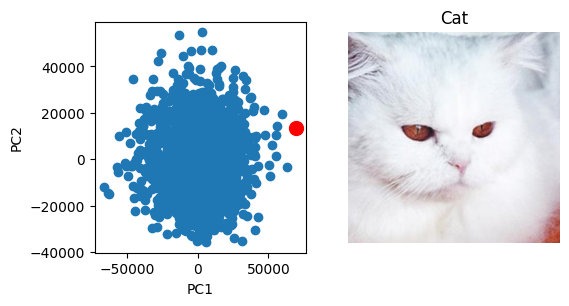


Removing the data that are not good enough from the matrix


In [ ]:
filtered_matrix = data_matrix.copy()

# Remove the 8 largest values of PC1, 5 smallest values of PC1,
# 5 largest values of PC2 and 5 smallest values of PC2
max_pc1s = nargmax(pc_1, 8)
min_pc1s = nargmin(pc_1, 5)
max_pc2s = nargmax(pc_2, 5)
min_pc2s = nargmin(pc_2, 5)

remove_idx = np.concatenate((max_pc1s, min_pc1s, max_pc2s, min_pc2s))
filtered_matrix = np.delete(filtered_matrix, remove_idx, axis=0)

# Recompute PCA
cats_pca = PCA(n_components=50)
cats_pca.fit(filtered_matrix)
components = cats_pca.transform(filtered_matrix)

Create a fake image from the filtered data matrix and the pca


In [ ]:
# Using just PC1
w = 60000
synth_cat = average_cat + w * cats_pca.components_[0, :]

# Using PC1 and PC2
w0, w1 = 60000, 60000
synth_cat = (
    average_cat + w0 * cats_pca.components_[0, :] + w1 * cats_pca.components_[1, :]
)

synth_cat_img = create_u_byte_image_from_vector(synth_cat, height, width, channels)
plt.imshow(synth_cat_img)
plt.show()

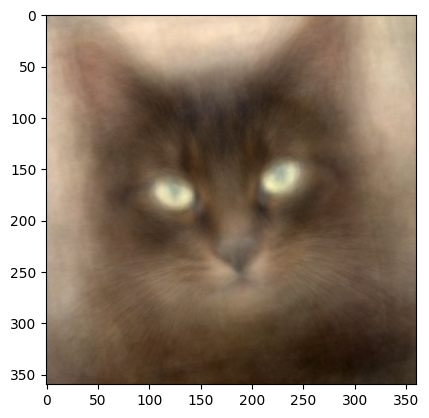


This func let you visualize the mode of variation of the m PC


In [ ]:
def visualize_mode_of_variation(m):
    synth_cat_plus = (
        average_cat
        + 3 * np.sqrt(cats_pca.explained_variance_[m]) * cats_pca.components_[m, :]
    )
    synth_cat_minus = (
        average_cat
        - 3 * np.sqrt(cats_pca.explained_variance_[m]) * cats_pca.components_[m, :]
    )

    fig, ax = plt.subplots(1, 3, figsize=(12, 4))
    ax[0].imshow(
        create_u_byte_image_from_vector(synth_cat_minus, height, width, channels)
    )
    ax[0].set_title("Cat - 3$\sigma$")
    ax[1].imshow(create_u_byte_image_from_vector(average_cat, height, width, channels))
    ax[1].set_title("Average cat")
    ax[2].imshow(
        create_u_byte_image_from_vector(synth_cat_plus, height, width, channels)
    )
    ax[2].set_title("Cat + 3$\sigma$")
    fig.suptitle("Mode of variation PC{}".format(m + 1))

Example
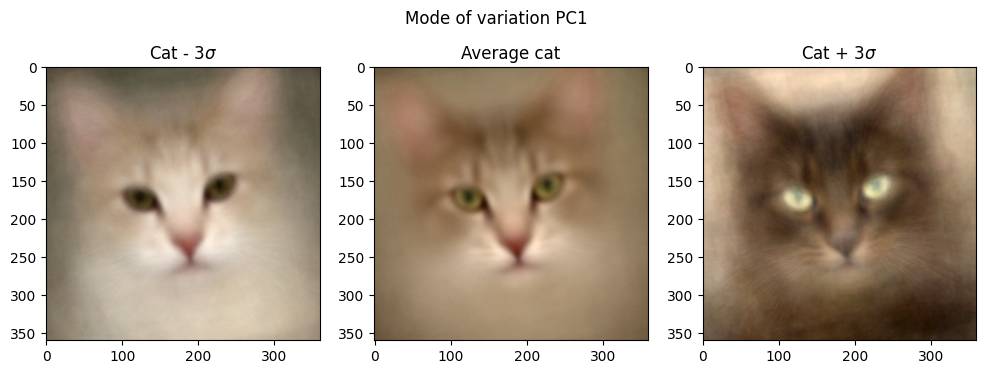


In [ ]:
# Generate random image from the datamatrix and the pca analysis
def random_cat_generator():
    w = np.random.randn(50) * 50000
    w = w * np.exp(-np.arange(50))  # Decrease the influence of the higher PCs
    synth_cat = average_cat + np.dot(w, cats_pca.components_)
    return create_u_byte_image_from_vector(synth_cat, height, width, channels)

Identify the missing img in the PCA plot


In [ ]:
im_miss = io.imread("data/MissingCatProcessed.jpg")
im_miss_flat = im_miss.flatten()
im_miss_flat = im_miss_flat.reshape(1, -1)
pca_coords = cats_pca.transform(im_miss_flat)
pca_coords = pca_coords.flatten()

components = cats_pca.transform(filtered_matrix)
pc_1 = components[:, 0]
pc_2 = components[:, 1]
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(pc_1, pc_2, "o")
ax.plot(pca_coords[0], pca_coords[1], "ro", label="Missing cat")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
plt.legend()
plt.show()

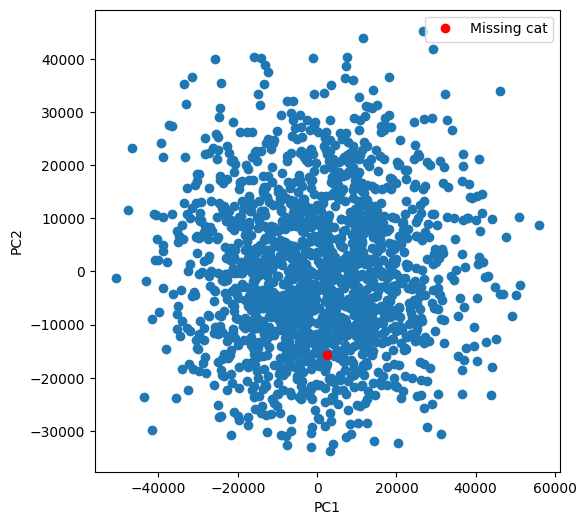


In [ ]:
n_components_to_use = 10
synth_cat = average_cat
for idx in range(n_components_to_use):
    synth_cat = synth_cat + pca_coords[idx] * cats_pca.components_[idx, :]

After this you can create a vector from ubyte and have your image of the nearest and the furthes dot in the plot


In [ ]:
comp_sub = components - pca_coords
pca_distances = np.linalg.norm(comp_sub, axis=1)

best_match = np.argmin(pca_distances)
best_twin_cat = data_matrix[best_match, :]
worst_match = np.argmax(pca_distances)
worst_twin_cat = data_matrix[worst_match, :]

In [ ]:
# 5 most nearest dot in the plot
n_best = 5
best = np.argpartition(pca_distances, n_best)
fig, ax = plt.subplots(ncols=n_best, figsize=(16, 4))
for i in range(n_best):
    candidate_twin_cat = data_matrix[best[i], :]
    ax[i].imshow(
        create_u_byte_image_from_vector(candidate_twin_cat, height, width, channels)
    )
    ax[i].axis("off")

# Use SimpleITK for 3D registration

### Prerequisiti

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk
from IPython.display import clear_output
from skimage.util import img_as_ubyte

In [ ]:
def imshow_orthogonal_view(sitkImage, origin=None, title=None):
    """
    Display the orthogonal views of a 3D volume from the middle of the volume.

    Parameters
    ----------
    sitkImage : SimpleITK image
        Image to display.
    origin : array_like, optional
        Origin of the orthogonal views, represented by a point [x,y,z].
        If None, the middle of the volume is used.
    title : str, optional
        Super title of the figure.

    Note:
    On the axial and coronal views, patient's left is on the right
    On the sagittal view, patient's anterior is on the left
    """
    data = sitk.GetArrayFromImage(sitkImage)

    if origin is None:
        origin = np.array(data.shape) // 2

    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    data = img_as_ubyte(data / np.max(data))
    axes[0].imshow(data[origin[0], ::-1, ::-1], cmap="gray")
    axes[0].set_title("Axial")

    axes[1].imshow(data[::-1, origin[1], ::-1], cmap="gray")
    axes[1].set_title("Coronal")

    axes[2].imshow(data[::-1, ::-1, origin[2]], cmap="gray")
    axes[2].set_title("Sagittal")

    [ax.set_axis_off() for ax in axes]

    if title is not None:
        fig.suptitle(title, fontsize=16)


def overlay_slices(sitkImage0, sitkImage1, origin=None, title=None):
    """
    Overlay the orthogonal views of a two 3D volume from the middle of the volume.
    The two volumes must have the same shape. The first volume is displayed in red,
    the second in green.

    Parameters
    ----------
    sitkImage0 : SimpleITK image
        Image to display in red.
    sitkImage1 : SimpleITK image
        Image to display in green.
    origin : array_like, optional
        Origin of the orthogonal views, represented by a point [x,y,z].
        If None, the middle of the volume is used.
    title : str, optional
        Super title of the figure.

    Note:
    On the axial and coronal views, patient's left is on the right
    On the sagittal view, patient's anterior is on the left
    """
    vol0 = sitk.GetArrayFromImage(sitkImage0)
    vol1 = sitk.GetArrayFromImage(sitkImage1)

    if vol0.shape != vol1.shape:
        raise ValueError("The two volumes must have the same shape.")
    if (
        np.min(vol0) < 0 or np.min(vol1) < 0
    ):  # Remove negative values - Relevant for the noisy images
        vol0[vol0 < 0] = 0
        vol1[vol1 < 0] = 0
    if origin is None:
        origin = np.array(vol0.shape) // 2

    sh = vol0.shape
    R = img_as_ubyte(vol0 / np.max(vol0))
    G = img_as_ubyte(vol1 / np.max(vol1))

    vol_rgb = np.zeros(shape=(sh[0], sh[1], sh[2], 3), dtype=np.uint8)
    vol_rgb[:, :, :, 0] = R
    vol_rgb[:, :, :, 1] = G

    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    axes[0].imshow(vol_rgb[origin[0], ::-1, ::-1, :])
    axes[0].set_title("Axial")

    axes[1].imshow(vol_rgb[::-1, origin[1], ::-1, :])
    axes[1].set_title("Coronal")

    axes[2].imshow(vol_rgb[::-1, ::-1, origin[2], :])
    axes[2].set_title("Sagittal")

    [ax.set_axis_off() for ax in axes]

    if title is not None:
        fig.suptitle(title, fontsize=16)

In [ ]:
def composite2affine(composite_transform, result_center=None):
    """
    Combine all of the composite transformation's contents to form an equivalent affine transformation.
    Args:
        composite_transform (SimpleITK.CompositeTransform): Input composite transform which contains only
                                                            global transformations, possibly nested.
        result_center (tuple,list): The desired center parameter for the resulting affine transformation.
                                    If None, then set to [0,...]. This can be any arbitrary value, as it is
                                    possible to change the transform center without changing the transformation
                                    effect.
    Returns:
        SimpleITK.AffineTransform: Affine transformation that has the same effect as the input composite_transform.

    Source:
        https://github.com/InsightSoftwareConsortium/SimpleITK-Notebooks/blob/master/Python/22_Transforms.ipynb
    """
    # Flatten the copy of the composite transform, so no nested composites.
    flattened_composite_transform = sitk.CompositeTransform(composite_transform)
    flattened_composite_transform.FlattenTransform()
    tx_dim = flattened_composite_transform.GetDimension()
    A = np.eye(tx_dim)
    c = np.zeros(tx_dim) if result_center is None else result_center
    t = np.zeros(tx_dim)
    for i in range(flattened_composite_transform.GetNumberOfTransforms() - 1, -1, -1):
        curr_tx = flattened_composite_transform.GetNthTransform(i).Downcast()
        # The TranslationTransform interface is different from other
        # global transformations.
        if curr_tx.GetTransformEnum() == sitk.sitkTranslation:
            A_curr = np.eye(tx_dim)
            t_curr = np.asarray(curr_tx.GetOffset())
            c_curr = np.zeros(tx_dim)
        else:
            A_curr = np.asarray(curr_tx.GetMatrix()).reshape(tx_dim, tx_dim)
            c_curr = np.asarray(curr_tx.GetCenter())
            # Some global transformations do not have a translation
            # (e.g. ScaleTransform, VersorTransform)
            get_translation = getattr(curr_tx, "GetTranslation", None)
            if get_translation is not None:
                t_curr = np.asarray(get_translation())
            else:
                t_curr = np.zeros(tx_dim)
        A = np.dot(A_curr, A)
        t = np.dot(A_curr, t + c - c_curr) + t_curr + c_curr - c

    return sitk.AffineTransform(A.flatten(), t, c)

In [ ]:
# Callback invoked when the StartEvent happens, sets up our new data.
def start_plot():
    global metric_values, multires_iterations

    metric_values = []
    multires_iterations = []


# Callback invoked when the EndEvent happens, do cleanup of data and figure.
def end_plot():
    global metric_values, multires_iterations

    del metric_values
    del multires_iterations
    # Close figure, we don't want to get a duplicate of the plot latter on.
    plt.close()


# Callback invoked when the IterationEvent happens, update our data and display new figure.
def plot_values(registration_method):
    global metric_values, multires_iterations

    metric_values.append(registration_method.GetMetricValue())
    # Clear the output area (wait=True, to reduce flickering), and plot current data
    clear_output(wait=True)
    # Plot the similarity metric values
    plt.plot(metric_values, "r")
    plt.plot(
        multires_iterations,
        [metric_values[index] for index in multires_iterations],
        "b*",
    )
    plt.xlabel("Iteration Number", fontsize=12)
    plt.ylabel("Metric Value", fontsize=12)
    plt.show()


# Callback invoked when the sitkMultiResolutionIterationEvent happens, update the index into the
# metric_values list.
def update_multires_iterations():
    global metric_values, multires_iterations
    multires_iterations.append(len(metric_values))


def command_iteration(method):
    print(
        f"{method.GetOptimizerIteration():3} "
        + f"= {method.GetMetricValue():10.5f} "
        + f": {method.GetOptimizerPosition()}"
    )

## Advanced 3D registration


- Loading and 3D image and ortho view visualization
- Create and apply affine matrix transformation
- Registration of a moving image to a fixed image
- Convert the transformation to a homogeneous matrix
- Store and load the transformation matrix
- Change the rotation center to the center of the image
- Generate a series of rotated 3D images
- Combining a series of affine matrices


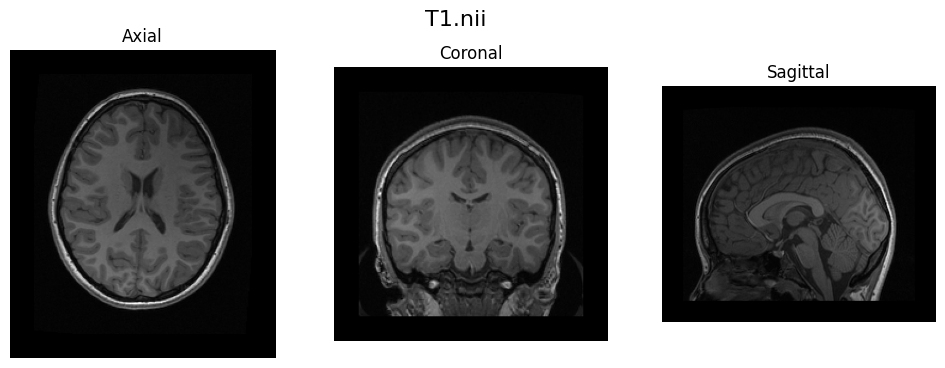

In [ ]:
# Loading and 3D image and ortho view visualization
dir_in = "data/"

vol_sitk = sitk.ReadImage(dir_in + "ImgT1.nii")


# Display the volume

imshow_orthogonal_view(vol_sitk, title="T1.nii")

In [ ]:
def rotation_matrix(pitch, roll, yaw):
    """
    Returns the rotation matrix for given roll, pitch, and yaw angles.
    """
    cos_pitch = np.cos(pitch)
    sin_pitch = np.sin(pitch)
    cos_roll = np.cos(roll)
    sin_roll = np.sin(roll)
    cos_yaw = np.cos(yaw)
    sin_yaw = np.sin(yaw)

    # Define the rotation matrix for pitch, roll, and yaw
    R_pitch = np.array(
        [[1, 0, 0], [0, cos_pitch, -sin_pitch], [0, sin_pitch, cos_pitch]],
    )

    R_roll = np.array([[cos_roll, 0, sin_roll], [0, 1, 0], [-sin_roll, 0, cos_roll]])

    R_yaw = np.array([[cos_yaw, -sin_yaw, 0], [sin_yaw, cos_yaw, 0], [0, 0, 1]])

    # Combine the rotation matrices to obtain the final rotation matrix
    rotation_matrix = np.dot(R_yaw, np.dot(R_pitch, R_roll))
    return rotation_matrix

In [ ]:
# Create affine matrix
import numpy as np
from math import radians

# Convert degrees to radians for the pitch angle

pitch_deg = 25

pitch_rad = radians(pitch_deg)


# Get the rotation matrix for the given pitch angle and zero roll and yaw

affine_matrix = np.eye(4)

affine_matrix[:3, :3] = rotation_matrix(pitch_rad, 0, 0)


print("4x4 Affine Matrix with a pitch of 25 degrees:")

print(affine_matrix)

4x4 Affine Matrix with a pitch of 25 degrees:
[[ 1.          0.          0.          0.        ]
 [ 0.          0.90630779 -0.42261826  0.        ]
 [ 0.          0.42261826  0.90630779  0.        ]
 [ 0.          0.          0.          1.        ]]


In [ ]:
# Convert degrees to radians for the pitch angle
pitch_deg = 25
pitch_rad = radians(pitch_deg)

# Create an affine transform
transform = sitk.AffineTransform(3)  # 3D transformation

# Set the rotation matrix to the affine transform
transform.SetMatrix(rotation_matrix(pitch_rad, 0, 0).flatten())

# Apply the transformation to the image
rotated_image = sitk.Resample(vol_sitk, transform)

# Save the rotated image
sitk.WriteImage(rotated_image, "T1_A.nii")

Find the geometrical transformation of the moving image to the fixed image.

The moving image is ImgT1_A.nii and the fixed image is ImgT1.nii.

The new rotated image is named ImgT1_B.nii and the optimal affine transformation matrix text file is named A1.txt. You can try to modify the metric and optimizer step length.


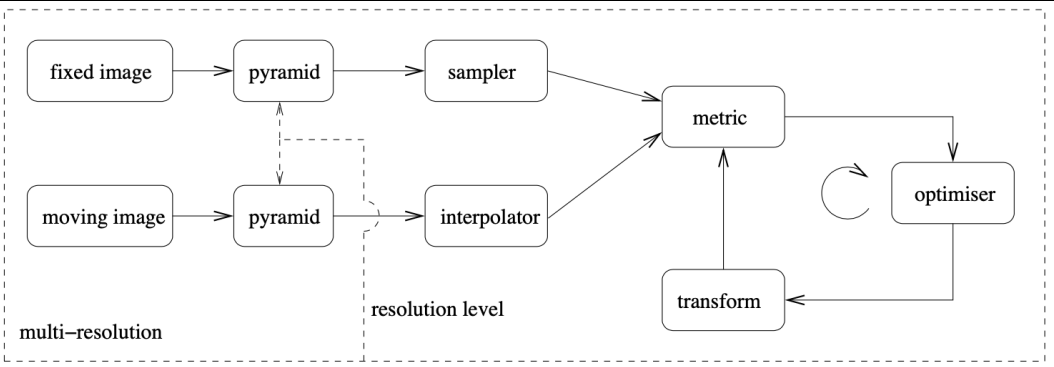


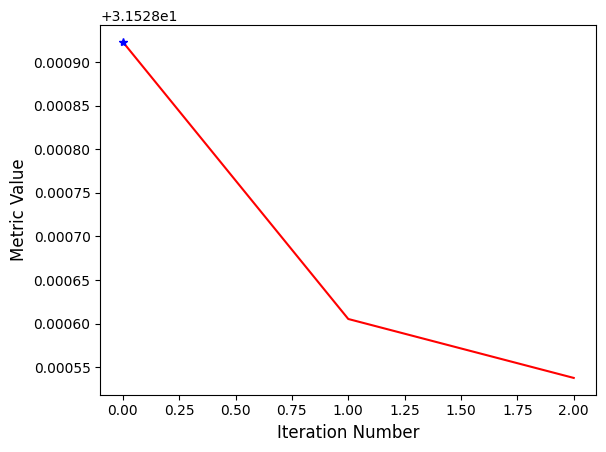

In [ ]:
# Set the registration - Fig. 1 from the Theory Note
R = sitk.ImageRegistrationMethod()

# Set a one-level the pyramid scheule. [Pyramid step]
R.SetShrinkFactorsPerLevel(shrinkFactors=[2])
R.SetSmoothingSigmasPerLevel(smoothingSigmas=[0])
R.SmoothingSigmasAreSpecifiedInPhysicalUnitsOn()

# Set the interpolator [Interpolation step]
R.SetInterpolator(sitk.sitkLinear)

# Set the similarity metric [Metric step]
R.SetMetricAsMeanSquares()

# Set the sampling strategy [Sampling step]
R.SetMetricSamplingStrategy(R.RANDOM)
R.SetMetricSamplingPercentage(0.50)

# Set the optimizer [Optimization step]
R.SetOptimizerAsPowell(stepLength=0.1, numberOfIterations=25)


# Initialize the transformation type to rigid
initTransform = sitk.Euler3DTransform()
R.SetInitialTransform(initTransform, inPlace=False)

# Some extra functions to keep track to the optimization process
# R.AddCommand(sitk.sitkIterationEvent, lambda: command_iteration(R)) # Print the iteration number and metric value
R.AddCommand(
    sitk.sitkStartEvent, start_plot
)  # Plot the similarity metric values across iterations
R.AddCommand(sitk.sitkEndEvent, end_plot)
R.AddCommand(sitk.sitkMultiResolutionIterationEvent, update_multires_iterations)
R.AddCommand(sitk.sitkIterationEvent, lambda: plot_values(R))

# Estimate the registration transformation [metric, optimizer, transform]
tform_reg = R.Execute(vol_sitk, ImgT1_A)

# Apply the estimated transformation to the moving image
ImgT1_B = sitk.Resample(ImgT1_A, tform_reg)

# Save
sitk.WriteImage(ImgT1_B, dir_in + "ImgT1_B.nii")

In [ ]:
# estimated transformation
estimated_tform = tform_reg.GetNthTransform(0).GetMatrix()  # Transform matrix

estimated_translation = tform_reg.GetNthTransform(
    0
).GetTranslation()  # Translation vector

params = tform_reg.GetParameters()  # Parameters (Rx, Ry, Rz, Tx, Ty, Tz)

In [ ]:
# convert the transformation to a homogeneous matrix
def homogeneous_matrix_from_transform(transform):
    """Convert a SimpleITK transform to a homogeneous matrix."""

    matrix = np.zeros((4, 4))

    matrix[:3, :3] = np.reshape(np.array(transform.GetMatrix()), (3, 3))

    matrix[:3, 3] = transform.GetTranslation()

    matrix[3, 3] = 1

    return matrix


matrix_estimated = homogeneous_matrix_from_transform(tform_reg.GetNthTransform(0))

matrix_applied = homogeneous_matrix_from_transform(transform)

In [ ]:
# Store and load the transformation matrix
tform_reg.WriteTransform(dir_in + "A1.tfm")

tform_loaded = sitk.ReadTransform(dir_in + "A1.tfm")

Exercise 7: By default, SimpleITK uses the fixed image’s origin as the rotation center. Change the rotation center to the center of the fixed image and repeat the registration. Compare the results.


In [ ]:
# Change the rotation center to the center of the image
initTransform = sitk.CenteredTransformInitializer(
    vol_sitk,
    ImgT1_A,
    sitk.Euler3DTransform(),
    sitk.CenteredTransformInitializerFilter.GEOMETRY,
)

## Generate a series of rotated 3D images


Exercise 8: Make four rotation matrices that rotate the ImgT1nii in steps of 60 degrees starting from 60 degrees. Apply the rotation to ImgT1.nii, reslice and store the resulting images as ImgT1_60.nii, ImgT1_120.nii etc. Show in ortho-view that the rotations are applied as expected for each new image.


In [ ]:
# Generate four rotation matrices for an image and store them
degrees = [60, 120, 180, 240, 300, 360]


for deg in degrees:
    # Convert degrees to radians for the pitch angle

    pitch_rad = radians(deg)

    # Create an affine transform

    transform = sitk.AffineTransform(3)  # 3D transformation

    # Set the rotation matrix to the affine transform

    transform.SetMatrix(rotation_matrix(pitch_rad, 0, 0).flatten())

    # Apply the transformation to the image

    rotated_image = sitk.Resample(vol_sitk, transform)

    # Save the rotated image

    sitk.WriteImage(rotated_image, f"T1_{deg}" + ".nii")

In [ ]:
# Combining a series of affine matrices
# 240 = fixed

# vol_stick = moved

tform_loaded = sitk.ReadTransform(dir_in + file_names[i])


# Load the transforms from file

tform_60 = sitk.ReadTransform(dir_in + file_names[0])

tform_180 = sitk.ReadTransform(dir_in + file_names[1])

tform_240 = sitk.ReadTransform(dir_in + file_names[2])

tform_0 = sitk.ReadTransform(dir_in + "A1.tfm")


# Option A: Combine the transforms using the sitk.CompositeTransform(3) function

# Concatenate - The last added transform is applied first

tform_composite = sitk.CompositeTransform(3)


tform_composite.AddTransform(tform_240.GetNthTransform(0))

tform_composite.AddTransform(tform_180.GetNthTransform(0))

tform_composite.AddTransform(tform_60.GetNthTransform(0))

tform_composite.AddTransform(tform_0.GetNthTransform(0))

# Transform the composite transform to an affine transform

affine_composite = composite2affine(tform_composite)


# Option B: Combine the transforms manually through multiplication of the homogeneous matrices

A = np.eye(4)

for i in range(tform_composite.GetNumberOfTransforms() - 1, -1, -1):
    tform = tform_composite.GetNthTransform(i)

    A_curr = homogeneous_matrix_from_transform(tform)

    A = np.dot(A_curr, A)


tform = sitk.Euler3DTransform()

tform.SetMatrix(A[:3, :3].flatten())

tform.SetTranslation(A[:3, 3])

tform.SetCenter([0, 0, 0])

overlay_slices(Img_fix, Img_mov, title=f"Original (red) vs. ImgT1_{deg} (green)")